### Companies and Regional Economic Activity

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

import warnings
warnings.filterwarnings("ignore")

In [26]:
font_dirs = ['assets/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

mpl.rcParams.update({
    'font.family' : 'DM Sans',
    'axes.labelweight' : 'bold',
    'axes.labelcolor' : '#6E6C83',
    'axes.edgecolor' : '#DEDEE9',
    'ytick.minor.size' : 0,
    'ytick.major.size' : 0,
    'ytick.color' : '#6E6C83',
    'xtick.minor.size' : 0,
    'xtick.major.size' : 0,
    'xtick.color' : '#6E6C83',
    'lines.color' : '#DEDEE9',
    'savefig.dpi' : 300,
    'figure.figsize' : [12,7],
    'figure.facecolor' : '#FFFFFF'
})

colors = ['#4A3AFF', '#0B0086', '#766AFF', '#E1DEFF']
colors2 = ['#0B0086', '#4A3AFF', '#766AFF', '#E1DEFF']

bgc = ['#FFFFFF']
textc = ['#1E1B39', '#6E6C83', '#4A3AFF', '#FFFFFF']

In [27]:
df = pd.read_csv('data/refined.csv') # company id, financials, location
fin = pd.read_csv('data/financials.csv') # company id, years, financials
gdp = pd.read_csv('data/region_gdp.csv') # region gdp per year

# company id, location (better than in the other file), name, and  code id for whether its still active or not
states = pd.read_csv('data/states.csv')

print(df.shape, fin.shape, gdp.shape, states.shape)

(20139, 75) (189064, 6) (18, 6) (91661, 6)


#### EDA

There are a lot of **null** values within the **'refined.csv'** dataframe.

That is because not all companies were active for all the years from **2005 to 2022**, and not all companies reported their financial data for some years. The file containing all the necessary financials is **'financials.csv'** where each companies financials are **grouped by year**.

The only cleaning that has to be done for this is for the **'location'** column where some locations are the same, but written in different ways. So we will take the locations from the **'states.csv'** file, that was provided for by the **government** data website.

In [28]:
# EDA for the REFINED CSV
print('DF - REFINED.CSV EDA')
print(df.info())
print('_________'*5)
print(df.describe())
display(df.head(3))

DF - REFINED.CSV EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20139 entries, 0 to 20138
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20139 non-null  int64  
 1   founded         20139 non-null  int64  
 2   location        20139 non-null  object 
 3   turnover_2022   19339 non-null  float64
 4   profit_2022     19339 non-null  float64
 5   debts_2022      19339 non-null  float64
 6   employees_2022  19339 non-null  float64
 7   turnover_2021   17928 non-null  float64
 8   profit_2021     17928 non-null  float64
 9   debts_2021      17928 non-null  float64
 10  employees_2021  17928 non-null  float64
 11  turnover_2020   16554 non-null  float64
 12  profit_2020     16554 non-null  float64
 13  debts_2020      16554 non-null  float64
 14  employees_2020  16554 non-null  float64
 15  turnover_2019   15409 non-null  float64
 16  profit_2019     15409 non-null  float64
 17  debts_2019

,id,founded,location,turnover_2022,profit_2022,debts_2022,employees_2022,turnover_2021,profit_2021,debts_2021,...,debts_2007,employees_2007,turnover_2006,profit_2006,debts_2006,employees_2006,turnover_2005,profit_2005,debts_2005,employees_2005
0,12056960,1999,Loc. Targu Mures,20994.0,1461.0,8204.0,0.0,65014.0,11451.0,19414.0,...,12021.0,0.0,444.0,-979.0,13.0,0.0,38791.0,24547.0,2158.0,0.0
1,10666988,1999,Loc. Sighisoara,147322811.0,9439869.0,22280864.0,423.0,112422027.0,6752691.0,13066302.0,...,6646370.0,416.0,46807963.0,2219596.0,3628111.0,424.0,37239539.0,3846087.0,2963655.0,418.0
2,10023982,1997,Loc. Targu Mures,37162.0,-7077.0,2726.0,4.0,74470.0,-7729.0,5009.0,...,146285.0,16.0,54983.0,126498.0,86423.0,17.0,81442.0,-20777.0,139619.0,17.0


In [29]:
# EDA for the FINANCIALS CSV
print('FIN - FINANCIALS.CSV EDA')
print(fin.info())
print('_________'*5)
print(fin.describe())
display(fin.head(3))

FIN - FINANCIALS.CSV EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189064 entries, 0 to 189063
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   year       189064 non-null  int64
 1   id         189064 non-null  int64
 2   employees  189064 non-null  int64
 3   turnover   189064 non-null  int64
 4   profit     189064 non-null  int64
 5   debts      189064 non-null  int64
dtypes: int64(6)
memory usage: 8.7 MB
None
_____________________________________________
                year            id      employees      turnover        profit  \
count  189064.000000  1.890640e+05  189064.000000  1.890640e+05  1.890640e+05   
mean     2015.587404  2.136939e+07       7.056293  4.704307e+05  2.534963e+04   
std         4.981324  1.238239e+07      62.933255  1.187683e+07  7.374805e+05   
min      2005.000000  6.133400e+04       0.000000 -2.724400e+04 -7.254303e+07   
25%      2012.000000  1.330003e+07       0.000000  5.073000

,year,id,employees,turnover,profit,debts
0,2005,61334,1,13477,1563,2162
1,2005,200106,243,31400665,217953,16318096
2,2005,236061,0,0,-18,136


We only need the **Years** as **year** and **Value_EUR** as **gdp**.

In [30]:
# EDA for the REGION GDP CSV
print('GDP - REGION_GDP.CSV EDA')
print(gdp.info())
print('_________'*5)
print(gdp.describe())
display(gdp.head(3))

GDP - REGION_GDP.CSV EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Years      18 non-null     int64  
 1   LEI        18 non-null     object 
 2   Value_LEI  18 non-null     float64
 3   EUR        18 non-null     object 
 4   Value_EUR  18 non-null     float64
 5   Rate       18 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 996.0+ bytes
None
_____________________________________________
             Years     Value_LEI    Value_EUR       Rate
count    18.000000     18.000000    18.000000  18.000000
mean   2013.500000  16036.316667  3569.905556   4.378333
std       5.338539   6538.895980  1140.695128   0.456679
min    2005.000000   6815.900000  1853.600000   3.380000
25%    2009.250000  11564.975000  2852.357500   4.242500
50%    2013.500000  14186.800000  3183.675000   4.480000
75%    2017.750000  20219.375000  43

,Years,LEI,Value_LEI,EUR,Value_EUR,Rate
0,2005,Millions lei,6815.9,Millions eur,1853.60,3.68
1,2006,Millions lei,8103.6,Millions eur,2396.31,3.38
2,2007,Millions lei,10288.1,Millions eur,2849.75,3.61


We can see many missing values. We'll cross check either the **financials** or the **refined** datasets for the company id to see if all of them are found within the dataframe. If they are, then we take the locations of those that do appear. If all of our companies also show up with a code, then we might be able to use it in some way to show whether a company is still active or not. However we must be careful since we only get a code, and not also a year of when a company stopped being active, or when they re-started their activity.

In [31]:
# EDA for the STATES CSV
print('STATES - STATES.CSV EDA')
print(states.info())
print('_________'*5)
print(states.describe())
display(states.head(3))

STATES - STATES.CSV EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91661 entries, 0 to 91660
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          91661 non-null  object 
 1   id            86976 non-null  float64
 2   registration  91661 non-null  object 
 3   euid          91661 non-null  object 
 4   state         75737 non-null  float64
 5   location      91660 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.2+ MB
None
_____________________________________________
                 id         state
count  8.697600e+04  75737.000000
mean   2.554579e+07   1070.573894
std    1.467381e+07     17.345674
min    0.000000e+00   1048.000000
25%    1.482521e+07   1048.000000
50%    2.569016e+07   1084.000000
75%    3.780218e+07   1084.000000
max    1.216209e+09   1145.000000


,name,id,registration,euid,state,location
0,DARABANT HORVATH ISTVAN ÎNTREPRINDERE INDIVIDUALĂ,33462634.0,F26/869/2014,ROONRC.F26/869/2014,NaN,Municipiul Târgu Mureş
1,NAGY I ILONA IBOLYA ÎNTREPRINDERE INDIVIDUALĂ,33462618.0,F26/870/2014,ROONRC.F26/870/2014,1048.0,Municipiul Târgu Mureş
2,POP MIREL OVIDIU PERSOANĂ FIZICĂ AUTORIZATĂ,33462600.0,F26/871/2014,ROONRC.F26/871/2014,1048.0,Municipiul Târgu Mureş


### Cleaning

In [32]:
# dropping the 'id' missing values, duplicates, and converting the id to
# the same datatype as the id in df
states = states.dropna(subset=['id'])
states['id'] = states['id'].astype(np.int64)
states = states[~states['id'].duplicated()]
print(states['id'].duplicated().sum())
print(states.isna().sum())
display(states[['id']].head(3))

0
name                0
id                  0
registration        0
euid                0
state           15924
location            1
dtype: int64


,id
0,33462634
1,33462618
2,33462600


In [33]:
# making a new dataframe with the id, and the location from 'df' and 'states'
# we'll be using the 'states' locations as they are consistent, and don't have
# different spellings for the same location. we might anonimize the locations later
loc_df = df[['id','location']].copy()
loc_df = pd.merge(loc_df, states[['id','location']], on='id', how='left')
loc_df = loc_df.drop_duplicates()

In [34]:
# we have a few NaNs, so we fill the values for the location_y with the correct ones
loc_df.loc[(loc_df['location_x'] == 'Loc. Ludus') & loc_df['location_y'].isnull(), 'location_y'] = 'Loc. Luduş, Oraş Luduş'
loc_df.loc[(loc_df['location_x'].isin(['Loc. Targu Mures','Targu Mures'])) & loc_df['location_y'].isnull(), 'location_y'] = 'Municipiul Târgu Mureş'
loc_df.loc[(loc_df['location_x'] == 'Sat Seleus, Com. Zagar') & loc_df['location_y'].isnull(), 'location_y'] = 'Sat Seleuş, Comuna Zagăr'
loc_df.loc[(loc_df['location_x'] == 'Loc. Sighisoara') & loc_df['location_y'].isnull(), 'location_y'] = 'Municipiul Sighişoara'

display(loc_df[loc_df['location_y'].isnull()])
print('There are', len(loc_df['location_y'].unique()), 'unique locations')

,id,location_x,location_y


There are 459 unique locations


In [35]:
# renaming the columns for the GDP dataframe, and dropping the other columns as they're not needed
gdp.rename(columns={'Years':'year', 'Value_EUR':'gdp', 'EUR':'unit'}, inplace=True)
gdp = gdp[['year','gdp','unit']]
gdp.head(3)

,year,gdp,unit
0,2005,1853.60,Millions eur
1,2006,2396.31,Millions eur
2,2007,2849.75,Millions eur


### Most of these visuals will have no titles or axis titles as they're going to be used for the presentation

### Number of Companies Founded per Year

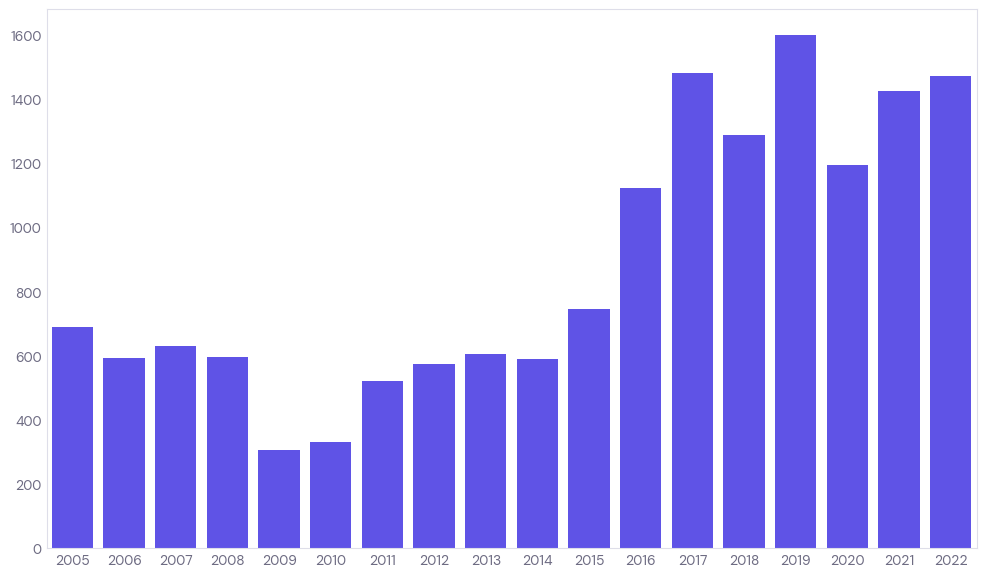

In [36]:
companies_founded = df.groupby(['founded'])['id'].count().reset_index()
companies_founded.rename(columns={'founded':'year','id':'count'}, inplace=True)
sns.barplot(data=companies_founded.tail(18), x='year', y='count', color=colors[0])
plt.xlabel('')
plt.ylabel('')
plt.show()

### Region GDP Growth over Years

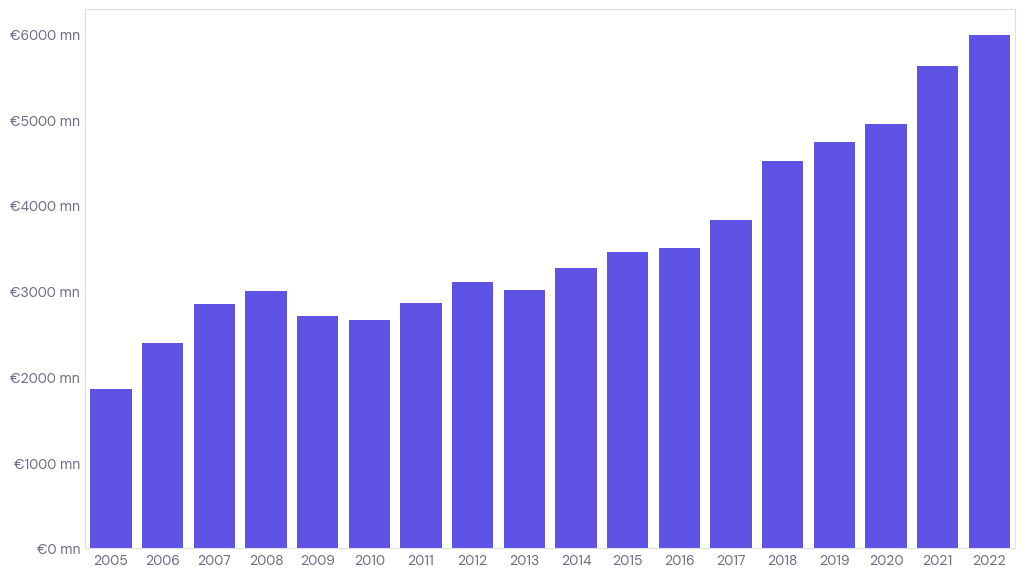

In [37]:
sns.barplot(data=gdp, x='year', y='gdp', color=colors[0]).yaxis.set_major_formatter('€{x:1.0f} mn')
plt.xlabel('')
plt.ylabel('')
plt.show()

### % GDP Growth + % Number of Newly Registered Companies

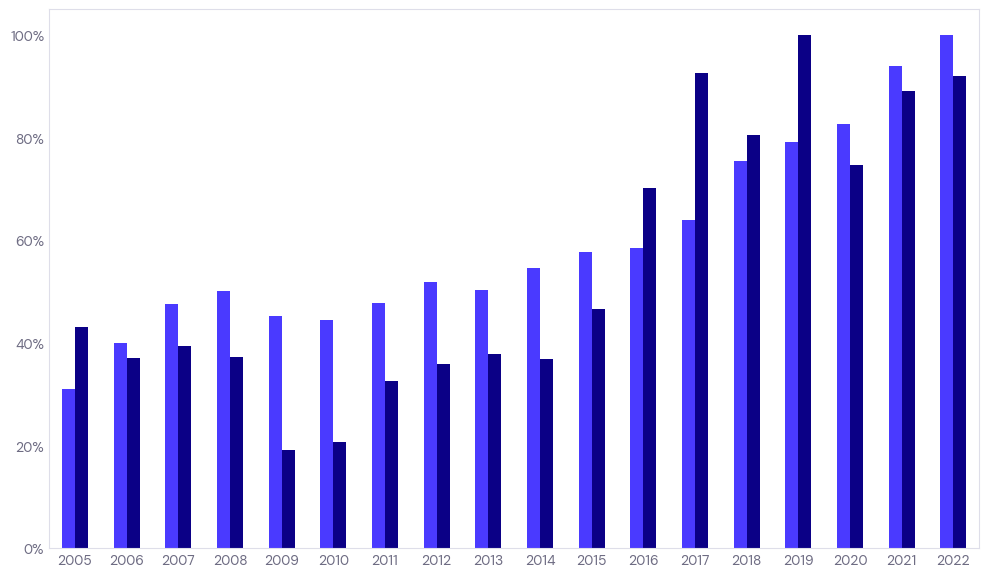

In [38]:
gdp_comp = pd.merge(gdp, companies_founded.tail(18), on='year', how='left')

gdp_comp['gdp_pct'] = round((gdp_comp['gdp'] / gdp_comp['gdp'].max() * 100),2)
gdp_comp['count_pct'] = round((gdp_comp['count'] / gdp_comp['count'].max() * 100),2)

gdp_fig = gdp_comp.plot.bar(rot=0, color=colors, x='year', y=['gdp_pct','count_pct'])
gdp_fig.get_legend().remove()
gdp_fig.yaxis.set_major_formatter('{x:1.0f}%')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Year on Year Change

Change - Year on Year - in Numbers - How many companies that were active last year, aren't active this year.

Difference between: Total Active Companies in Current Year, Newly Registered Companies in Current Year, Total Active Companies in Previous Year

In [39]:
year_on_year = fin.groupby(['year'])['id'].count().reset_index()
year_on_year = pd.merge(year_on_year, companies_founded[['year','count']], on='year', how='left')
year_on_year.rename(columns={'id':'active','count':'founded'}, inplace=True)

In [40]:
founded = year_on_year['founded'].values
act = year_on_year['active'].values
diff = []

for i in range(len(act)):
    if i == 0:
        diff.append(0)
    else:
        diff.append(act[i] - founded[i] - act[i-1])

year_on_year['diff'] = diff
year_on_year.tail(3)

,year,active,founded,diff
15,2020,16553,1192,-48
16,2021,17927,1424,-50
17,2022,19337,1469,-59


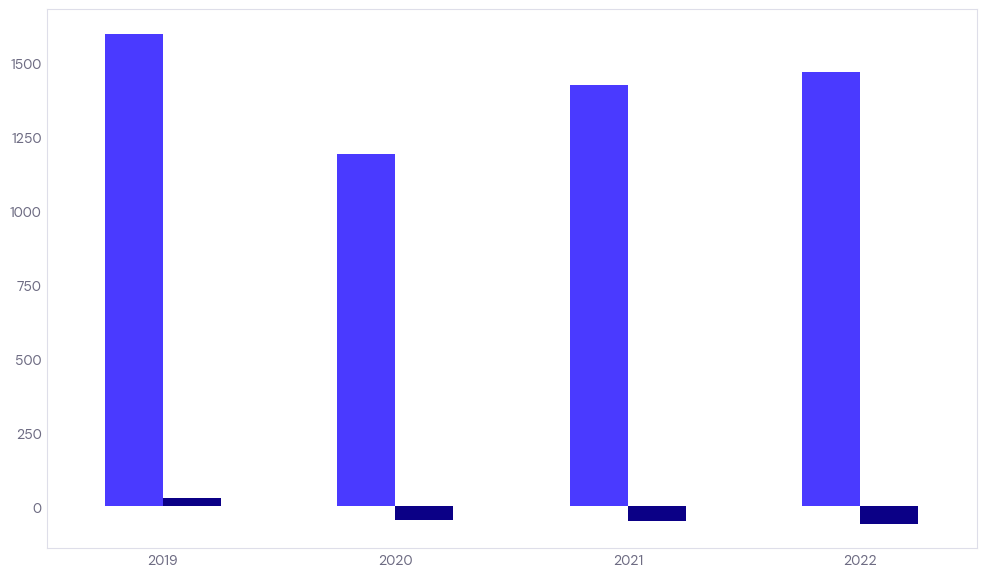

In [41]:
# difference between number of newly registered companies and the ones that either paused their activity or retook it (if 'diff' > 0)
year_on_year.tail(4).plot.bar(rot=0, color=colors, x='year', y=['founded','diff']).get_legend().remove()
plt.xlabel('')
plt.ylabel('')
plt.show()

### Debt per Year

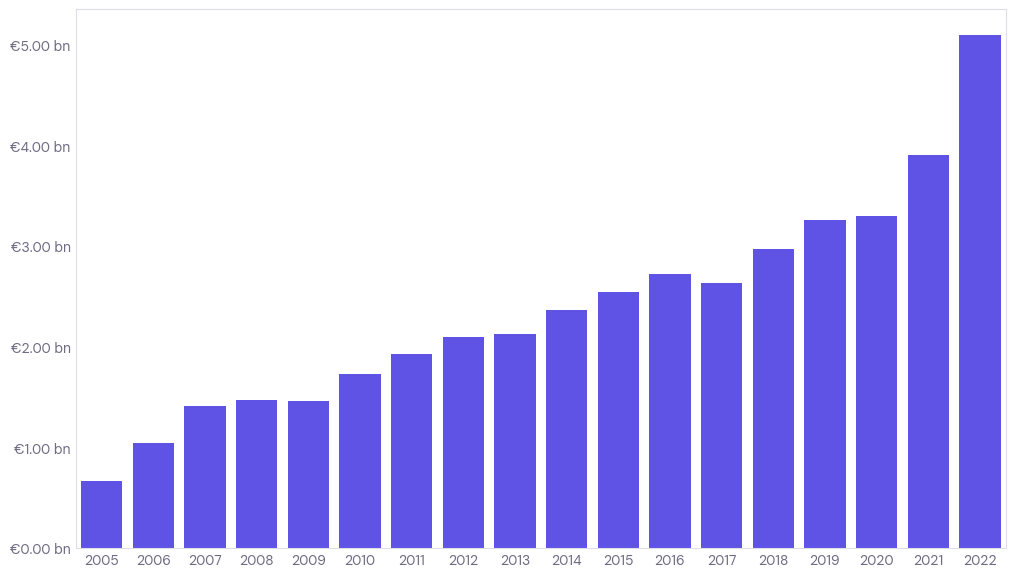

In [42]:
yearly_total = fin.groupby('year').sum().reset_index()
yearly_total['debts'] = yearly_total['debts'] / 1000000000
yearly_total['profit'] = yearly_total['profit'] / 1000000
yearly_total['turnover'] = yearly_total['turnover'] / 1000000000

sns.barplot(data=yearly_total, x='year', y='debts', color=colors[0], ci=None).yaxis.set_major_formatter('€{x:1.2f} bn')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Turnover vs Debts per Year

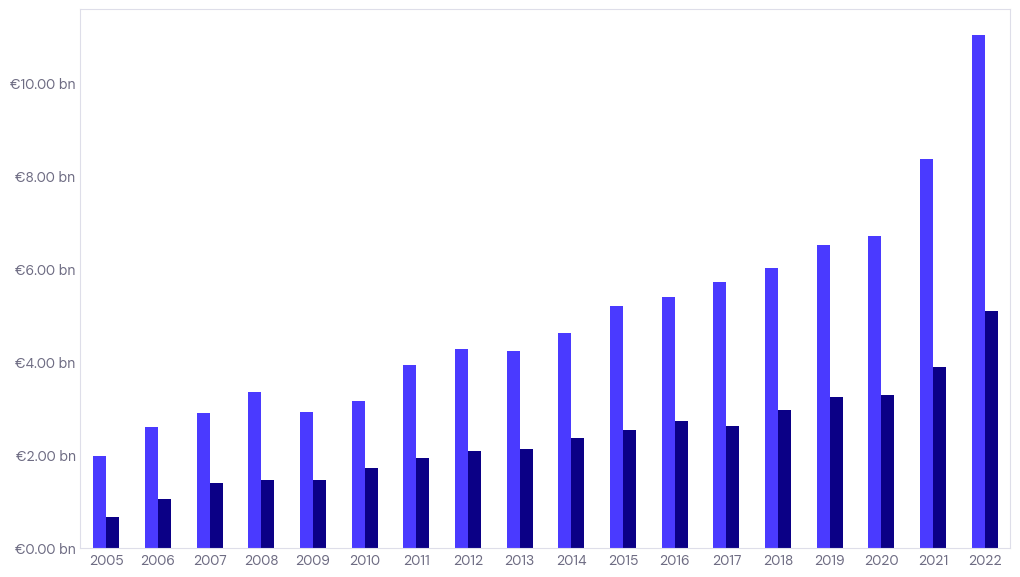

In [43]:
fins_fig = yearly_total.plot.bar(x='year', y=['turnover', 'debts'], color=colors)
fins_fig.get_legend().remove()
fins_fig.yaxis.set_major_formatter('€{x:1.2f} bn')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Profit Total per Year

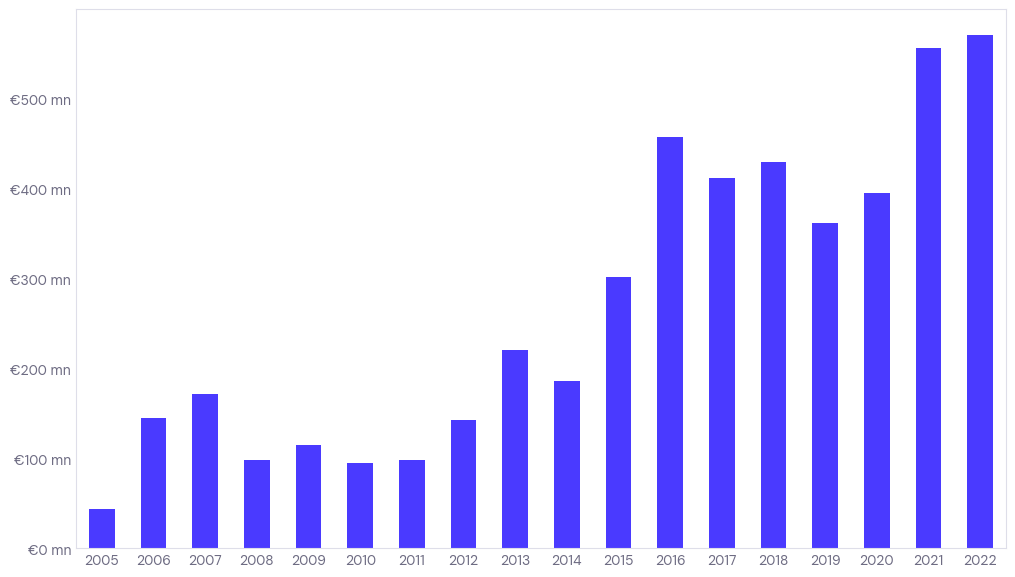

In [44]:
profit_fig = yearly_total.plot.bar(x='year', y='profit', color=colors[0])
profit_fig.get_legend().remove()
profit_fig.yaxis.set_major_formatter('€{x:1.0f} mn')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

### 2019 (Pre-Pandemic) and 2020-2022 (Pandemic) - Profit of Companies total

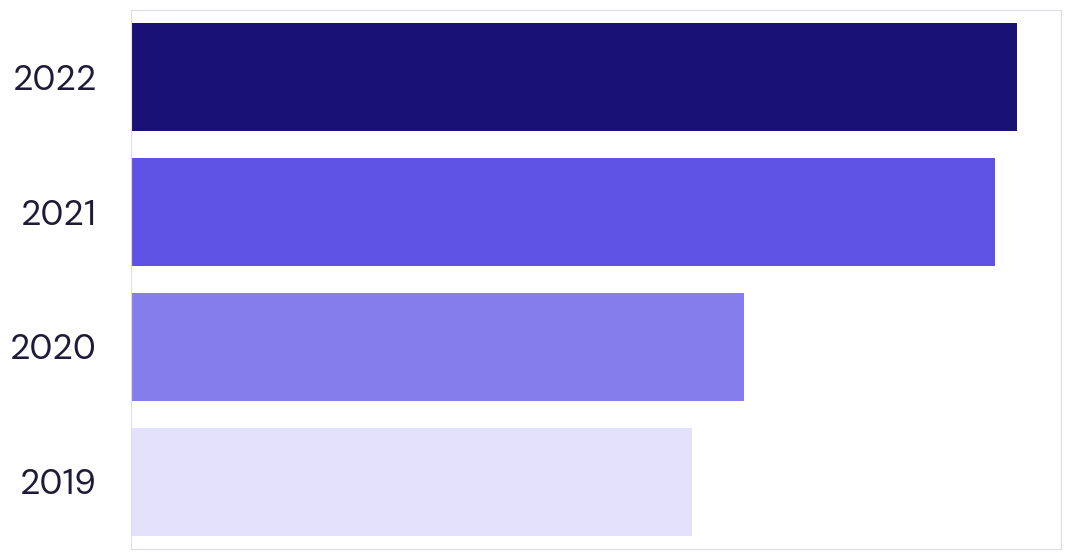

In [45]:
years_profits = yearly_total.tail(4).copy()
years_profits = years_profits.iloc[::-1]

plt.figure(figsize=(12,7))
sns.barplot(data=years_profits, x='profit', y='year', palette=colors2, ci=None, orient='h', order=years_profits['year']).xaxis.set_major_formatter('')
plt.tick_params(axis='y', which='major', pad=25)
plt.yticks(fontsize=25, fontweight='bold', color='#1E1B39')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Companies per location

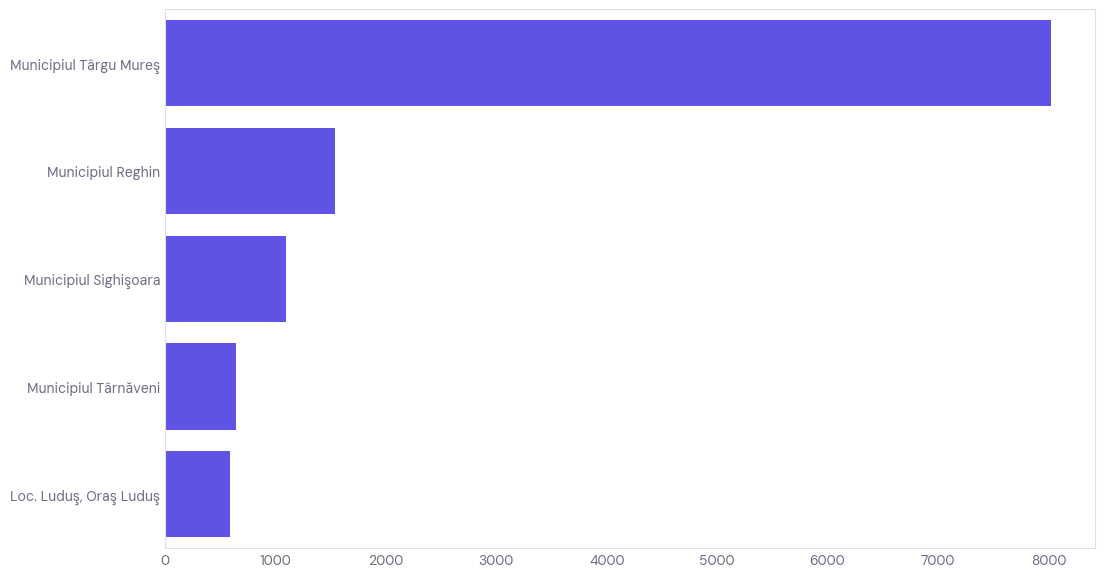

In [46]:
locations = loc_df.groupby('location_y')['id'].count().reset_index()
locations.sort_values(by='id', ascending=False, inplace=True)
locations

sns.barplot(locations.head(5), x='id', y='location_y', orient='h', color=colors[0])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [47]:
total_comp = locations.id.sum()
total_top5 = locations.id.head(5).sum()
total_rest = locations.id.iloc[5::].sum()

pct_top5 = round((total_top5 / total_comp * 100),2)
pct_top3 = round((locations.id.head(3).sum() / total_comp * 100),2)
pct_rest5 = round((total_rest / total_comp * 100),2)
pct_rest3 = round((locations.id.iloc[3::].sum() / total_comp * 100),2)

pct_mures = round((locations.id.iloc[0] / total_comp * 100),2)
pct_reghin = round((locations.id.iloc[1] / total_comp * 100),2)
pct_sigh = round((locations.id.iloc[2] / total_comp * 100),2)

print(f'First 5 contain {pct_top5}% of all companies. The rest contain {pct_rest5}% of the total combined')
print(f'First 3 contain {pct_top3}% of all companies. The rest contain {pct_rest3}% of the total combined')
print(f'Tg. Mures has {pct_mures}%, Reghin has {pct_reghin}%, and Sighisoara has {pct_sigh}%')

First 5 contain 59.01% of all companies. The rest contain 40.99% of the total combined
First 3 contain 52.93% of all companies. The rest contain 47.07% of the total combined
Tg. Mures has 39.83%, Reghin has 7.65%, and Sighisoara has 5.46%


### Contribution of Companies based on size to population, employment, turnover

### Size of Company - By Number of Employees

In [48]:
size_empl = fin.copy()
size_empl.loc[size_empl['employees'].between(0,49), 'size'] = 'Small'
size_empl.loc[size_empl['employees'].between(50,249), 'size'] = 'Medium'
size_empl.loc[size_empl['employees'] >= 250, 'size'] = 'Large'

size_empl.loc[size_empl['employees'] < 1, 'employer'] = 'No'
size_empl.loc[size_empl['employees'] > 0, 'employer'] = 'Yes'

print('Number of companies with NO employees: ',len(size_empl[(size_empl['employer'] == 'No') & (size_empl['year'] == 2022)]), 'and with employees', len(size_empl[(size_empl['employer'] == 'Yes') & (size_empl['year'] == 2022)]))
print('Number of companies 0-249 employees: ',len(size_empl[(size_empl['size'].isin(['Small', 'Medium'])) & (size_empl['year'] == 2022)]), 'and 0-49: ', len(size_empl[(size_empl['size'].isin(['Small'])) & (size_empl['year'] == 2022)]))
print('Number LARGE companies 2022', len(size_empl[(size_empl['size'].isin(['Large'])) & (size_empl['year'] == 2022)]), 'and ALL companies:', len(size_empl[(size_empl['year'] == 2022)]))

Number of companies with NO employees:  7185 and with employees 12152
Number of companies 0-249 employees:  19308 and 0-49:  19098
Number LARGE companies 2022 29 and ALL companies: 19337


In [49]:
size_sum = size_empl.groupby(['year','size','employer']).sum().reset_index()
display(size_sum.drop(columns='id').tail(4))

size_sum2 = size_empl.groupby(['year','size','employer'])[['id']].count().reset_index()
display(size_sum2.tail(4))

,year,size,employer,employees,turnover,profit,debts
68,2022,Large,Yes,20471,5236683771,-60767816,2385203993
69,2022,Medium,Yes,21758,2011995921,117487620,768295524
70,2022,Small,No,0,134282690,41056462,229179253
71,2022,Small,Yes,49396,3647632004,472693983,1713341740


,year,size,employer,id
68,2022,Large,Yes,29
69,2022,Medium,Yes,210
70,2022,Small,No,7185
71,2022,Small,Yes,11913


In [50]:
size_sum3 = size_empl[size_empl['year'] == 2022].groupby(['size'])[['id']].count().reset_index()
size_sum3 = pd.merge(size_sum3,size_empl[size_empl['year'] == 2022].groupby(['size'])[['employees','turnover']].sum().reset_index(), on='size', how='left')
size_sum3['pct_pop'] = round((size_sum3['id'] / size_sum3['id'].sum() * 100),1)
size_sum3['pct_emp'] = round((size_sum3['employees'] / size_sum3['employees'].sum() * 100),1)
size_sum3['pct_to'] = round((size_sum3['turnover'] / size_sum3['turnover'].sum() * 100),1)
display(size_sum3)

,size,id,employees,turnover,pct_pop,pct_emp,pct_to
0,Large,29,20471,5236683771,0.1,22.3,47.5
1,Medium,210,21758,2011995921,1.1,23.7,18.2
2,Small,19098,49396,3781914694,98.8,53.9,34.3


### Distribution of Companies and their characteristics

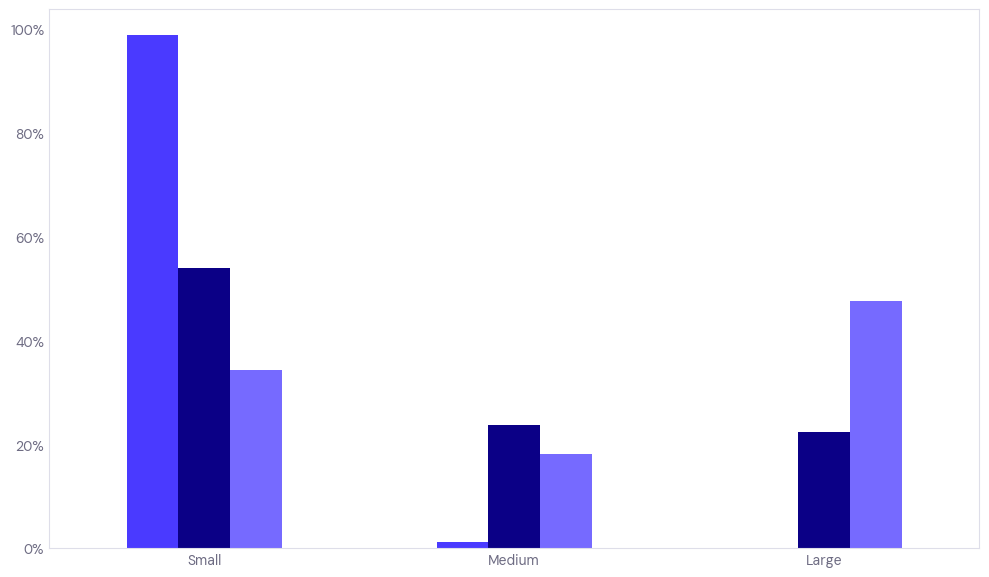

In [51]:
size_fig = size_sum3[::-1].plot.bar(x='size', y=['pct_pop', 'pct_emp','pct_to'], color=colors)
size_fig.get_legend().remove()
size_fig.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Profitability

In [52]:
profitable = size_empl.copy()
profitable.loc[profitable['profit'] == 0, 'prof'] = 'Break-even'
profitable.loc[profitable['profit'] > 0, 'prof'] = 'Profitable'
profitable.loc[profitable['profit'] < 0, 'prof'] = 'Not Profitable'

profitable['prof_margin'] = round(((profitable['profit'] / profitable['turnover']) * 100),2)

profitable.loc[profitable['prof_margin'].isnull(), 'prof_margin'] = 0
profitable.loc[profitable['prof_margin'] == -np.inf, 'prof_margin'] = -100
profitable.loc[profitable['prof_margin'] == np.inf, 'prof_margin'] = 100

### Profitability % Breakdown

In [53]:
prof_count = profitable.groupby(['year','prof'])[['id']].count().reset_index()
prof_avg = pd.merge(prof_count,year_on_year[['year','active']], on='year', how='left' )
prof_avg['avg'] = round(((prof_avg['id']/prof_avg['active'] * 100)),2)

print('average number of companies based on profitability profile \n\n', prof_avg.groupby('prof')['avg'].mean())

average number of companies based on profitability profile 

 prof
Break-even         4.901667
Not Profitable    32.415556
Profitable        62.683889
Name: avg, dtype: float64


### % Profitable Companies in 2022 - Graph

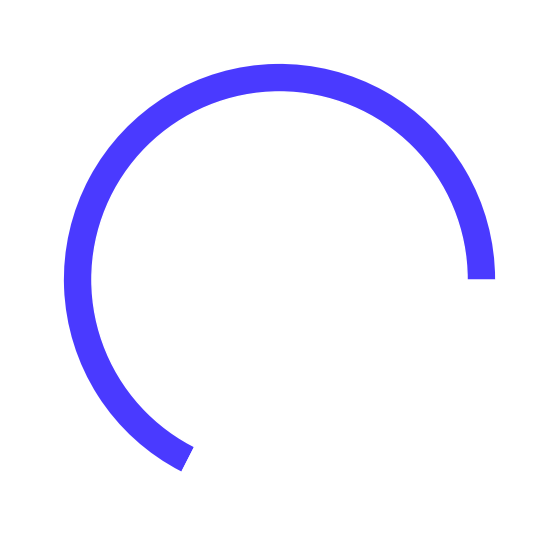

In [36]:
p_fig = plt.figure()
ax = p_fig.add_subplot(1,1,1)
col = colors=colors[:3]
col.append('white')
ax.pie([13049,4870+1418], colors=['#4A3AFF','white'])
ax.add_artist(plt.Circle((0,0), 0.87, color='white'))
p_fig.show()


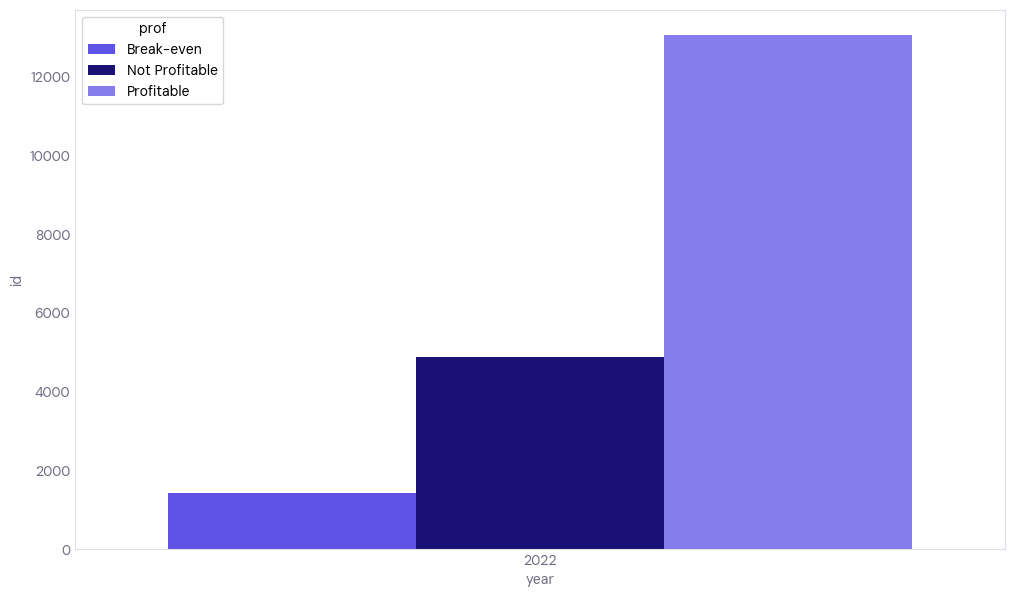

,year,prof,id,pct
51,2022,Break-even,1418,7.33
52,2022,Not Profitable,4870,25.18
53,2022,Profitable,13049,67.48


In [37]:
prof_count_22 = prof_count[prof_count['year'] == 2022].copy()
prof_count_22['pct'] = round(((prof_count_22['id']/ 19337 * 100)),2)
sns.barplot(prof_count_22, x='year', y='id', hue='prof', palette=colors)
plt.show()
prof_count_22

### Biggest Employers, Profit Margin % Companies that aren't employers

Are there Large companies in other locations except the top 3 ones?

In [38]:
prof_locs = pd.merge(profitable,loc_df[['id', 'location_y']], on='id', how='left')
prof_22 = prof_locs[(prof_locs['year'] == 2022) & (prof_locs['prof'] == 'Profitable')].copy()

prof_22_100 = prof_22[prof_22['prof_margin'] == 100] # profit margin 100%

print(len(prof_22_100['location_y'].unique()), 'unique locations')
print(len(prof_22_100[prof_22_100['employer'] == 'No']), 'companies have no employees')

prof_22_100.sort_values(by='profit', ascending=False).head(3)

57 unique locations
139 companies have no employees


,year,id,employees,turnover,profit,debts,size,employer,prof,prof_margin,location_y
170310,2022,1246560,0,0,5842872,0,Small,No,Profitable,100.0,Municipiul Târnăveni
173571,2022,16170338,1,0,955706,573305,Small,Yes,Profitable,100.0,Municipiul Târgu Mureş
170335,2022,1251469,0,0,888183,1611,Small,No,Profitable,100.0,"Sat Vînatori, Comuna Vînatori"


### Top 5 Biggest Employers and their data - 2022

In [60]:
big_22 = profitable[profitable['year'] == 2022].copy()
big_22 = big_22[big_22['size'] == 'Large'].sort_values(by='employees', ascending=False).head(5)
big_22 = big_22.drop(columns=['year','size','employer'])
big_22['pct']

,id,employees,turnover,profit,debts,prof,prof_margin
171974,10976687,5384,349288436,-25278897,521349204,Not Profitable,-7.24
175438,21408186,1608,136669019,2955927,71232688,Profitable,2.16
178417,32039122,1224,99607465,-3805483,87206406,Not Profitable,-3.82
169797,1200490,960,439877457,6035143,285992908,Profitable,1.37
170222,1235668,928,175562007,-18591667,106073364,Not Profitable,-10.59


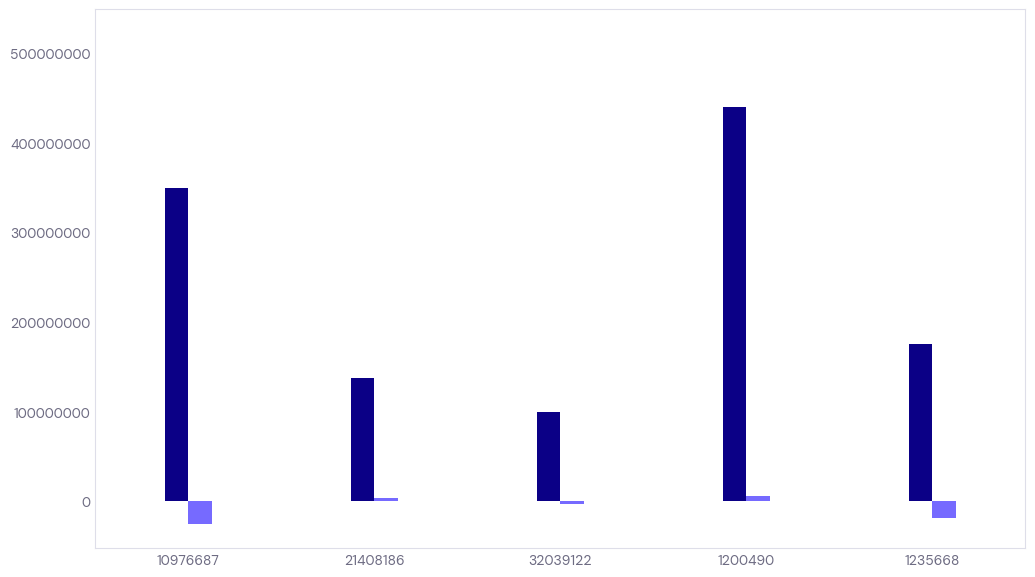

In [116]:
b_fig = big_22.plot.bar(x='id', y=['employees', 'turnover','profit','debts'], color=colors)
b_fig.get_legend().remove()
b_fig.yaxis.set_major_formatter('{x:1.0f}')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

### Top 3 Locations breakdown by Company Size

In [94]:
size_sum4 = prof_locs[prof_locs['year'] == 2022].groupby(['location_y', 'size'])[['id']].count().reset_index()
size_sum4 = pd.merge(size_sum4,prof_locs[prof_locs['year'] == 2022].groupby(['location_y'])[['id']].count().reset_index(), on='location_y', how='left')
size_sum4['pct'] = round((size_sum4['id_x'] / size_sum4['id_y'] * 100),1)
size_sum4 = size_sum4.sort_values(by='id_y', ascending=False)
display(size_sum4.head(9))

,location_y,size,id_x,id_y,pct
93,Municipiul Târgu Mureş,Small,7579,7677,98.7
92,Municipiul Târgu Mureş,Medium,89,7677,1.2
91,Municipiul Târgu Mureş,Large,9,7677,0.1
86,Municipiul Reghin,Medium,23,1479,1.6
87,Municipiul Reghin,Small,1453,1479,98.2
85,Municipiul Reghin,Large,3,1479,0.2
90,Municipiul Sighişoara,Small,1072,1086,98.7
89,Municipiul Sighişoara,Medium,12,1086,1.1
88,Municipiul Sighişoara,Large,2,1086,0.2


### Top 3 locations by company size

We can see nothing is changed in the top 3, compared to top cities with the total number of companies

In [115]:
loc_big = size_sum4[size_sum4['size'] == 'Large'][['location_y','id_x']].sort_values(by='id_x', ascending=False)
loc_med = size_sum4[size_sum4['size'] == 'Medium'][['location_y','id_x']].sort_values(by='id_x', ascending=False)
loc_small = size_sum4[size_sum4['size'] == 'Small'][['location_y','id_x']].sort_values(by='id_x', ascending=False)
display(loc_big.head(3),loc_med.head(3),loc_small.head(3))

,location_y,id_x
91,Municipiul Târgu Mureş,9
85,Municipiul Reghin,3
88,Municipiul Sighişoara,2


,location_y,id_x
92,Municipiul Târgu Mureş,89
86,Municipiul Reghin,23
89,Municipiul Sighişoara,12


,location_y,id_x
93,Municipiul Târgu Mureş,7579
87,Municipiul Reghin,1453
90,Municipiul Sighişoara,1072


### Top 3 locations for Companies with 100% Profit Margin

In [140]:
prof_22_100_summed = pd.merge(prof_22_100.groupby('location_y')['id'].count().reset_index(), prof_22_100.groupby('location_y')['profit'].sum().reset_index(), on='location_y', how='left')
top5_profit = prof_22_100_summed.sort_values(by='profit', ascending=False).head(5).reset_index()
top5_count = prof_22_100_summed.sort_values(by='id', ascending=False).head(5).reset_index()

top5_count['pct_count'] = round((top5_count['id'] / prof_22_100_summed['id'].sum() * 100),1)
top5_profit['pct_count'] = round((top5_profit['id'] / prof_22_100_summed['id'].sum() * 100),1)

top5_count['pct_prof'] = round((top5_count['profit'] / prof_22_100_summed['profit'].sum() * 100),1)
top5_profit['pct_prof'] = round((top5_profit['profit'] / prof_22_100_summed['profit'].sum() * 100),1)
top5_count

,index,location_y,id,profit,pct_count,pct_prof
0,11,Municipiul Târgu Mureş,75,2786226,39.5,22.0
1,10,Municipiul Sighişoara,13,42649,6.8,0.3
2,12,Municipiul Târnăveni,10,5845552,5.3,46.2
3,9,Municipiul Reghin,8,227266,4.2,1.8
4,38,"Sat Livezeni, Comuna Livezeni",7,1726114,3.7,13.7


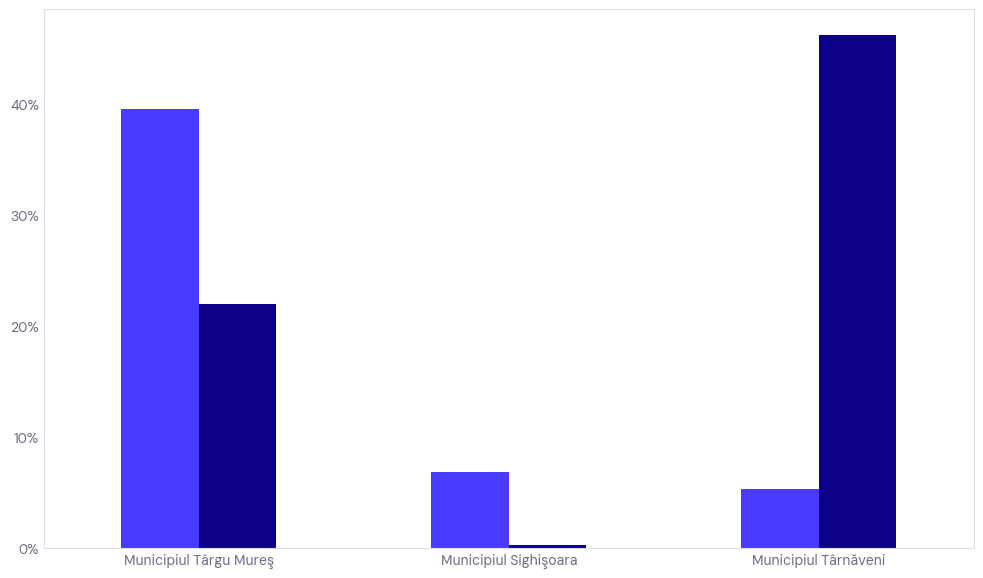

In [139]:
# top 3 locations by number of companies with 100% margin
loc_100_count = top5_count.head(3).plot.bar(x='location_y', y=['pct_count','pct_prof'], color=colors)
loc_100_count.get_legend().remove()
loc_100_count.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

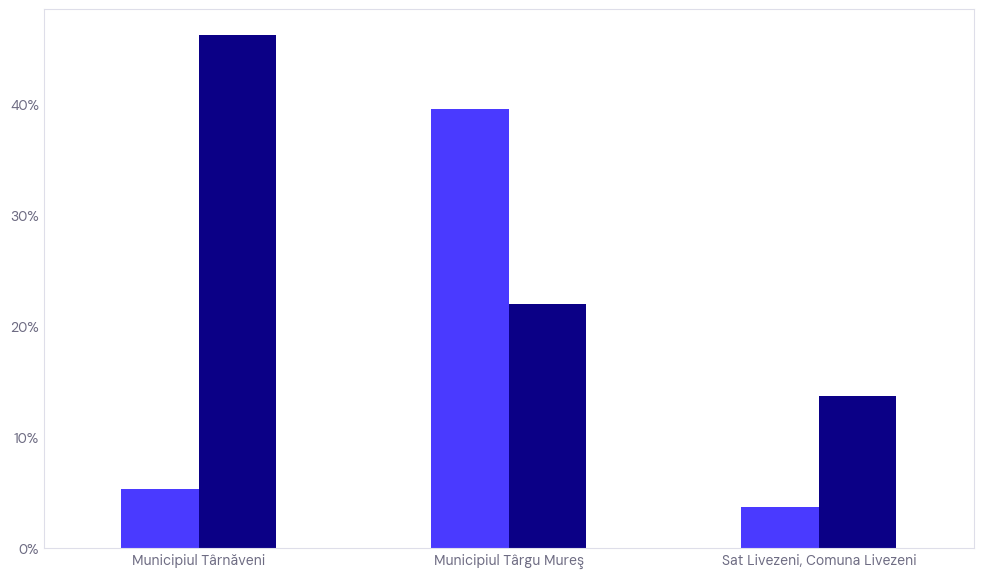

In [138]:
# top 3 locations by profit of companies with 100% margin
loc_100_pr = top5_profit.head(3).plot.bar(x='location_y', y=['pct_count','pct_prof'], color=colors)
loc_100_pr.get_legend().remove()
loc_100_pr.yaxis.set_major_formatter('{x:1.0f}%')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('')
plt.show()

### % Non Employers - Profitability Break Down

In [46]:
# Companies with no employees in 2022. How many are profitable
no_empl = profitable[profitable['employer'] == 'No'].copy()
no_empl_22 = no_empl[no_empl['year'] == 2022].groupby('prof')['id'].count().reset_index()
no_empl_22['pct'] = round(((no_empl_22['id']/ no_empl_22['id'].sum() * 100)),2)
no_empl_22

,prof,id,pct
0,Break-even,1393,19.39
1,Not Profitable,2239,31.16
2,Profitable,3553,49.45


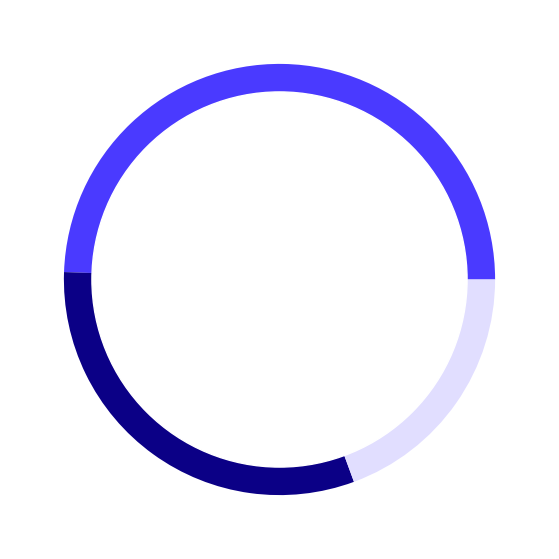

In [48]:
pr_fig = plt.figure()
ax = pr_fig.add_subplot(1,1,1)
col = colors=colors[:3]
col.append('white')
ax.pie([3553,2239,1393], colors=['#4A3AFF','#0B0086','#E1DEFF'])
ax.add_artist(plt.Circle((0,0), 0.87, color='white'))
pr_fig.show()
